In [1]:
# Handle table-like data and matrices :
import pandas as pd 
import numpy as np
import datetime
# Visualisation
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# Modelling Algorithms -Regression:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
# Modelling Helpers :
from sklearn.model_selection import train_test_split
#preprocessing :
from sklearn.preprocessing import  StandardScaler
# Regression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as sci

In [2]:
df = pd.read_csv("diamonds.csv")# load dataset
print(df.head(10))#visualise dataset

   Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43   
1           2   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31   
2           3   0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31   
3           4   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63   
4           5   0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75   
5           6   0.24  Very Good     J    VVS2   62.8   57.0  3.94  3.96  2.48   
6           7   0.24  Very Good     I    VVS1   62.3   57.0  3.95  3.98  2.47   
7           8   0.26  Very Good     H     SI1   61.9   55.0  4.07  4.11  2.53   
8           9   0.22       Fair     E     VS2   65.1   61.0  3.87  3.78  2.49   
9          10   0.23  Very Good     H     VS1   59.4   61.0  4.00  4.05  2.39   

   price  
0    326  
1    326  
2    327  
3    334  
4    335  
5    336  
6    336  
7    337  
8    337 

In [3]:
df.drop(['Unnamed: 0'] , axis=1 , inplace=True)# remove the first column
print(df.head(5))# check

   carat      cut color clarity  depth  table     x     y     z  price
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43    326
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31    326
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31    327
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63    334
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75    335


In [4]:
print(df.isnull().sum()) # Check missing values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


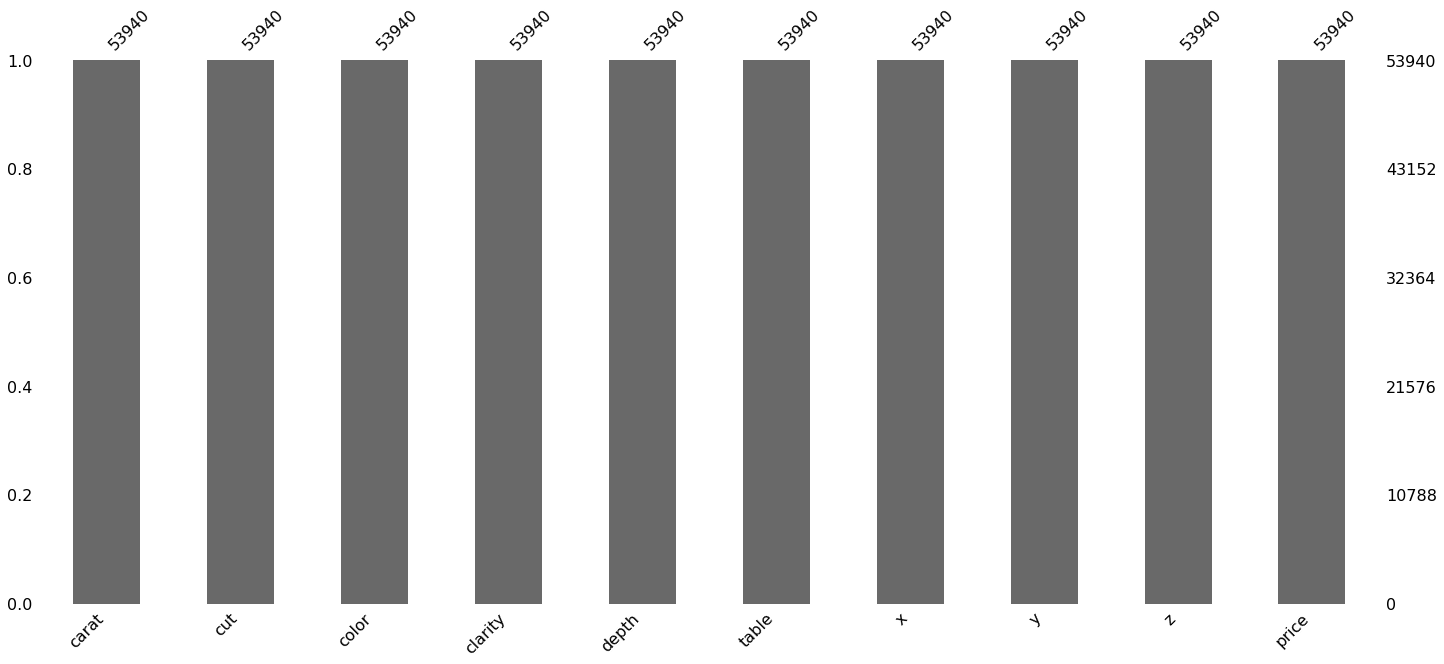

In [5]:
msno.bar(df,labels=True)#visualizig that there are no missing values

In [6]:
# here we can see the summry of the x, y and z min values are 0 which is impossible 
print(df.describe())

              carat         depth         table             x             y  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184      5.731157      5.734526   
std        0.474011      1.432621      2.234491      1.121761      1.142135   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.720000   
50%        0.700000     61.800000     57.000000      5.700000      5.710000   
75%        1.040000     62.500000     59.000000      6.540000      6.540000   
max        5.010000     79.000000     95.000000     10.740000     58.900000   

                  z         price  
count  53940.000000  53940.000000  
mean       3.538734   3932.799722  
std        0.705699   3989.439738  
min        0.000000    326.000000  
25%        2.910000    950.000000  
50%        3.530000   2401.000000  
75%        4.040000   5324.250000  


In [7]:
# Looking to see how many unreasonable values in dataset
print(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])
print(df.loc[(df['x']>20) | (df['y']>20) | (df['z']>20)])

       carat        cut color clarity  depth  table     x     y    z  price
2207    1.00    Premium     G     SI2   59.1   59.0  6.55  6.48  0.0   3142
2314    1.01    Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
4791    1.10    Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
5471    1.01    Premium     F     SI2   59.2   58.0  6.50  6.47  0.0   3837
10167   1.50       Good     G      I1   64.0   61.0  7.15  7.04  0.0   4731
11182   1.07      Ideal     F     SI2   61.6   56.0  0.00  6.62  0.0   4954
11963   1.00  Very Good     H     VS2   63.3   53.0  0.00  0.00  0.0   5139
13601   1.15      Ideal     G     VS2   59.2   56.0  6.88  6.83  0.0   5564
15951   1.14       Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
24394   2.18    Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
24520   1.56      Ideal     G     VS2   62.2   54.0  0.00  0.00  0.0  12800
26123   2.25    Premium     I     SI1   61.3   58.0  8.52  8.42  0.0  15397
26243   1.20

In [8]:
print(len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]))
print(len(df.loc[(df['x'] >20) | (df['y'] >20) | (df['z']>20)]))

20
3


In [9]:
# I dropped them as they don't make sense------Outliers && Zero
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
df = df[(df[['x', 'y', 'z']] < 20).all(axis=1)]
#Check wether they has been removed
print(len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]))
print(len(df.loc[(df['x'] >20) | (df['y'] >20) | (df['z']>20)]))

0
0


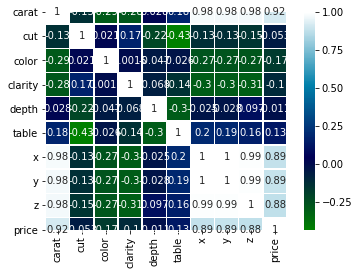

In [10]:
# mapping the categorical variables
mappingCut = {'Fair': 60,'Ideal': 100, 'Good': 70,'Very Good': 80, 'Premium': 90}
mappingCla = {'I1': 30, 'SI1': 40, 'SI2': 50, 'VS1': 60, 'VS2': 70, 'VVS1': 80, 'VVS2': 90, 'IF': 100}
mappingCol = {'J': 40, 'I': 50 , 'H': 60, 'G': 70,'F': 80 ,'E': 90, 'D': 100}
df = df.replace({'cut': mappingCut, 'clarity': mappingCla, 'color':mappingCol})

corr = df.corr()# looking at the correlation of the variables to price
sns.heatmap(data = corr, square = True, annot = True, cbar = True, linewidths = 0.5,cmap='ocean')

In [11]:
# sns.set(color_codes=True)
# sns.distplot(df['price'])# looking for skew 

In [12]:
# # log transform as there is a skew and not linear and need it for the algorithms: 
# #The log transformation can be used to make highly skewed distributions less skewed. 
# #This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.
# X = df.drop(['price'], axis = 1)
# y = np.log(df['price'])
# sns.set(color_codes=True)
# sns.distplot(y)# check if it is repaired

In [13]:
# #sns.distplot(df['price'])
# sns.factorplot(data = X, kind = 'box', size = 4, aspect = 2.5)# looking at the range of all the variables

In [14]:
# names = X.columns
# # feature scaling - standardising
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)
# # changing back to a dataframe from an array
# X = pd.DataFrame(X, columns = names)
# # looking at the range after scaling
# sns.factorplot(data = X, kind = 'box', size = 4, aspect = 2.5)

In [15]:
# splitting into train and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 309)
Trainset,Testset = train_test_split(df, test_size = 0.3, random_state = 309)

In [16]:
    train_data_copy = Trainset.copy()
    X_train = train_data_copy.drop(["price"],axis=1)
    y_train = Trainset["price"]
   
    test_data_copy=Testset.copy();
    X_test = test_data_copy.drop(["price"],axis=1)
    y_test = test_data_copy["price"]

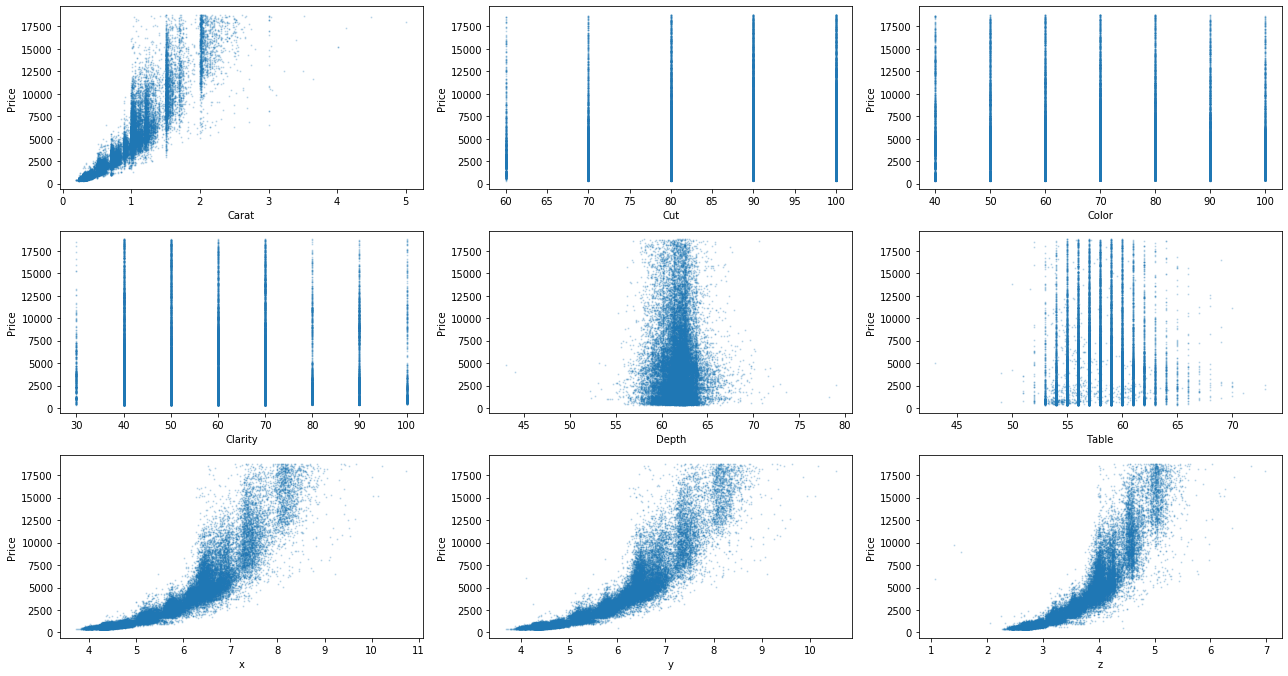

In [17]:
    fig, axs = plt.subplots(3, 3, figsize=(18, 10))
    axs = axs.ravel()
    axs[0].scatter(Trainset.carat,   Trainset.price, alpha = 0.2, s = 1)
    axs[0].set_xlabel('Carat')
    axs[1].scatter(Trainset.cut,     Trainset.price, alpha = 0.2, s = 1)
    axs[1].set_xlabel('Cut')
    axs[2].scatter(Trainset.color,   Trainset.price, alpha = 0.2, s = 1)
    axs[2].set_xlabel('Color')
    axs[3].scatter(Trainset.clarity, Trainset.price, alpha = 0.2, s = 1)
    axs[3].set_xlabel('Clarity')
    axs[4].scatter(Trainset.depth,   Trainset.price, alpha = 0.2, s = 1)
    axs[4].set_xlabel('Depth')
    axs[5].scatter(Trainset.table,   Trainset.price, alpha = 0.2, s = 1)
    axs[5].set_xlabel('Table')
    axs[6].scatter(Trainset.x,       Trainset.price, alpha = 0.2, s = 1)
    axs[6].set_xlabel('x')
    axs[7].scatter(Trainset.y,       Trainset.price, alpha = 0.2, s = 1)
    axs[7].set_xlabel('y')
    axs[8].scatter(Trainset.z,       Trainset.price, alpha = 0.2, s = 1)
    axs[8].set_xlabel('z')
    for i in range(9):
        axs[i].set_ylabel('Price')
        axs[i].set_xlim(auto = True)
        axs[i].set_ylim(auto = True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [18]:
########################
# sns.jointplot(x="x", y="price", data=df,kind='scatter',stat_func=sci.pearsonr,s=1);

In [19]:
########################
# sns.jointplot(x="y", y="price", data=df,kind='scatter',stat_func=sci.pearsonr,s=1);

In [20]:
########################
# sns.jointplot(x="z", y="price", data=df,kind='scatter',stat_func=sci.pearsonr,s=1);

In [21]:
########################
# sns.jointplot(x="cut", y="price", data=df,kind='scatter',stat_func=sci.pearsonr);

In [22]:
########################
# sns.jointplot(x="carat", y="price", data=df,kind='scatter',stat_func=sci.pearsonr,s=1);

In [23]:
########################
# sns.jointplot(x="depth", y="price", data=df,kind='scatter',stat_func=sci.pearsonr,s=1);

In [24]:
########################
# sns.jointplot(x="table", y="price", data=df,kind='scatter',stat_func=sci.pearsonr,s=1);

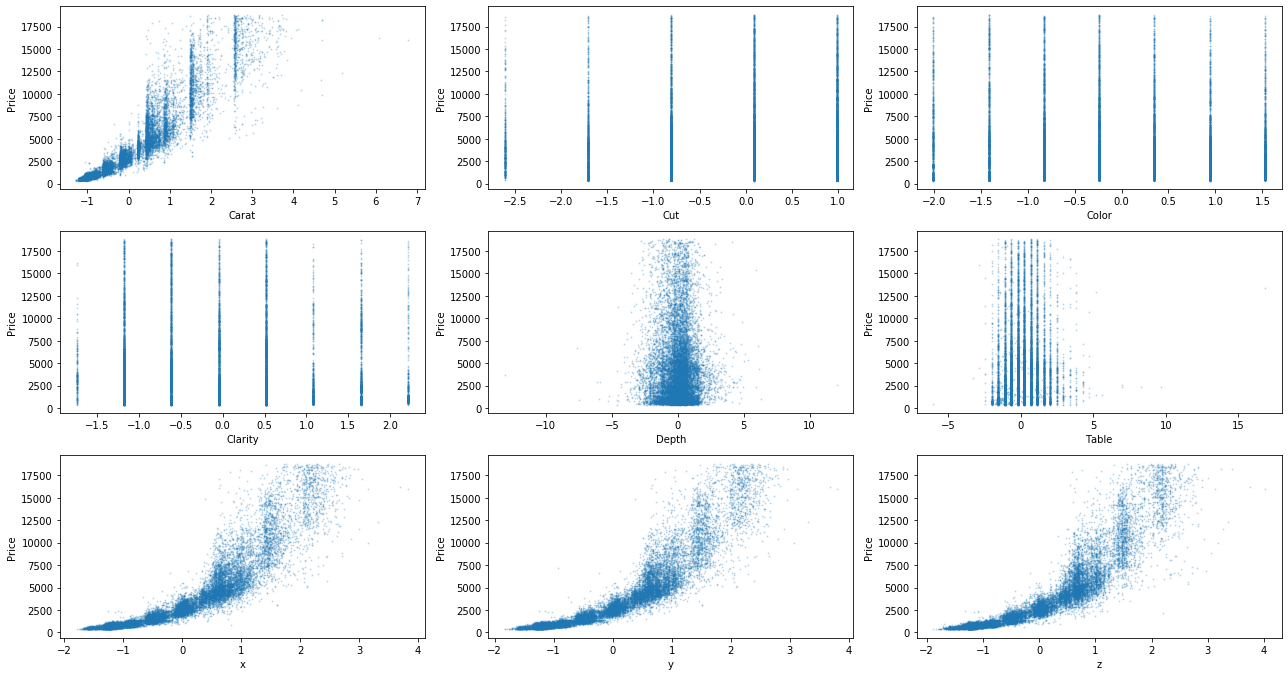

In [25]:
    #Standardize
    Xs_train_set_mean = X_train.mean()                          
    Xs_train_set_std  = X_train.std()
    Xs_train_set      = (X_train - Xs_train_set_mean) / Xs_train_set_std
    Xs_test_set       = (X_test  - Xs_train_set_mean) / Xs_train_set_std
    
    fig, axs = plt.subplots(3, 3, figsize=(18, 10))
    axs = axs.ravel()
    axs[0].scatter(Xs_test_set.carat,   y_test, alpha = 0.2, s = 1)
    axs[0].set_xlabel('Carat')
    axs[1].scatter(Xs_test_set.cut,     y_test, alpha = 0.2, s = 1)
    axs[1].set_xlabel('Cut')
    axs[2].scatter(Xs_test_set.color,   y_test, alpha = 0.2, s = 1)
    axs[2].set_xlabel('Color')
    axs[3].scatter(Xs_test_set.clarity, y_test, alpha = 0.2, s = 1)
    axs[3].set_xlabel('Clarity')
    axs[4].scatter(Xs_test_set.depth,   y_test, alpha = 0.2, s = 1)
    axs[4].set_xlabel('Depth')
    axs[5].scatter(Xs_test_set.table,   y_test, alpha = 0.2, s = 1)
    axs[5].set_xlabel('Table')
    axs[6].scatter(Xs_test_set.x,       y_test, alpha = 0.2, s = 1)
    axs[6].set_xlabel('x')
    axs[7].scatter(Xs_test_set.y,       y_test, alpha = 0.2, s = 1)
    axs[7].set_xlabel('y')
    axs[8].scatter(Xs_test_set.z,       y_test, alpha = 0.2, s = 1)
    axs[8].set_xlabel('z')
    for i in range(9):
        axs[i].set_ylabel('Price')
        axs[i].set_xlim(auto = True)
        axs[i].set_ylim(auto = True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
#     sns.jointplot(x="z", y="price", data=Xs_train_set,kind='scatter',stat_func=sci.pearsonr,s=1);

In [26]:
#This method is for print the time easily
import math
def PrintResult(regressor, label):
    start_time = datetime.datetime.now()
#     regressor.fit(X_train, y_train)#Estimators
    regressor.fit(Xs_train_set, y_train)#Estimators
#     y_pred = regressor.predict(X_test)#predict after fit
    y_pred = regressor.predict(Xs_test_set)#predict after fit
    
    end_time = datetime.datetime.now()  # Track learning ending time
    exection_time = (end_time - start_time).total_seconds()  # Track execution time
    
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = math.pow(mean_squared_error(y_test, y_pred), 0.5)#RMSE = mean_squared_error(y_test, y_pred)**0.5 #same
    R2 = r2_score(y_test, y_pred)
    
    print("--------------------------")
    print("Regressor: " + label)
    print(label + ' MSE    : %0.2f ' % MSE)
    print(label + ' RMSE   : %0.2f ' % RMSE)
    print(label + ' R2     : %0.2f ' % R2)
    print(label + ' MAE    : %0.2f ' % MAE)
    print("Learn: execution time={t:.3f} seconds".format(t = exection_time))
    print("--------------------------")

In [27]:
PrintResult(LinearRegression(), "Linear Regression")
PrintResult(KNeighborsRegressor(), "K-Neighbors Regression")
# printscoresforandrew(KNeighborsRegressor(n_neighbors=12), "K-Neighbors Regression -2")#n_neighbors=20

--------------------------
Regressor: Linear Regression
Linear Regression MSE    : 1627736.29 
Linear Regression RMSE   : 1275.83 
Linear Regression R2     : 0.90 
Linear Regression MAE    : 844.64 
Learn: execution time=0.022 seconds
--------------------------
--------------------------
Regressor: K-Neighbors Regression
K-Neighbors Regression MSE    : 634367.57 
K-Neighbors Regression RMSE   : 796.47 
K-Neighbors Regression R2     : 0.96 
K-Neighbors Regression MAE    : 410.80 
Learn: execution time=0.775 seconds
--------------------------


In [28]:
PrintResult(Ridge(), "Ridge Regression")

--------------------------
Regressor: Ridge Regression
Ridge Regression MSE    : 1627900.27 
Ridge Regression RMSE   : 1275.89 
Ridge Regression R2     : 0.90 
Ridge Regression MAE    : 844.66 
Learn: execution time=0.019 seconds
--------------------------


In [29]:
PrintResult(DecisionTreeRegressor(), "Decision Tree Regression")

--------------------------
Regressor: Decision Tree Regression
Decision Tree Regression MSE    : 573069.27 
Decision Tree Regression RMSE   : 757.01 
Decision Tree Regression R2     : 0.96 
Decision Tree Regression MAE    : 366.93 
Learn: execution time=0.352 seconds
--------------------------


In [30]:
PrintResult(RandomForestRegressor(), "Random Forest Regression")

--------------------------
Regressor: Random Forest Regression
Random Forest Regression MSE    : 327564.84 
Random Forest Regression RMSE   : 572.33 
Random Forest Regression R2     : 0.98 
Random Forest Regression MAE    : 286.73 
Learn: execution time=1.570 seconds
--------------------------


In [31]:
PrintResult(GradientBoostingRegressor(), "Gradient Boosting Regression")
PrintResult(SGDRegressor(), "SGD Regression")

--------------------------
Regressor: Gradient Boosting Regression
Gradient Boosting Regression MSE    : 438267.74 
Gradient Boosting Regression RMSE   : 662.02 
Gradient Boosting Regression R2     : 0.97 
Gradient Boosting Regression MAE    : 367.42 
Learn: execution time=1.889 seconds
--------------------------
--------------------------
Regressor: SGD Regression
SGD Regression MSE    : 1635738.70 
SGD Regression RMSE   : 1278.96 
SGD Regression R2     : 0.90 
SGD Regression MAE    : 850.06 
Learn: execution time=0.327 seconds
--------------------------


In [32]:
PrintResult(SVR(), "Support Vector Regression")

KeyboardInterrupt: 

In [ ]:
PrintResult(LinearSVR(), "LinearSVR")

In [ ]:
PrintResult(MLPRegressor(), "Multi-layer Perceptron Regression")

In [ ]:
#after tuning
PrintResult(LinearRegression(), "Linear Regression")
PrintResult(KNeighborsRegressor(n_neighbors=11,weights='distance'), "KNN")
PrintResult(Ridge(), "Ridge Regression")  
PrintResult(DecisionTreeRegressor(max_depth=9), "Decision Tree")
PrintResult(RandomForestRegressor(max_depth=9, random_state=0, n_estimators=700), "Random Forest")  
PrintResult(GradientBoostingRegressor(max_depth=5, n_estimators=1000,learning_rate=0.02, loss='ls'), "Gradient Boosting")
PrintResult(SGDRegressor(), "SGD")
PrintResult(SVR(C =500.0), "SVR")
PrintResult(LinearSVR(C=5.0,dual=True,loss='squared_epsilon_insensitive'), "LinearSVR")
PrintResult(MLPRegressor(learning_rate_init=0.2,solver='lbfgs',activation='relu'), "MLP")  